# Importing the data

In [1]:
#Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('credit_risk_data.csv')

# Exploratory data analysis and Preprocessing

In [3]:
print('The original dataset have {} columns and {} features'.format(df.shape[0], df.shape[1]))

The original dataset have 32581 columns and 12 features


In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Our dataframe contains the following attributes:
- **person_age**: Person's age.
- **person_income**: Person's income.
- **person_home_ownership**: Type of person's home.
- **person_emp_length**: Number of years the person is employed.
- **loan_intent**: Reason for the loan.
- **loan_grade**: Quality score of loan application.
- **loan_amnt**: Loan amount.
- **loan_int_rate**: Loan interest rate.
- **loan_status**: Status of loan. "0" if is not default and "1" if is default.
- **loan_percent_income**: Ratio of loan amount over income.
- **cb_person_default_on_file**: "Y" if the person has default in the past or "N" if not.
- **cb_person_cred_hist_length**: Amount of time in years the person has credit.

Let us see each feature's type.

In [5]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

The dtypes are already compatible with the information each feature contains. We don't need to change any of them. Let us now analyze the main statistics of the numeric features.

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


The features "person_age" and "person_emp_length" show inconsistent data, since they show as maximum values 144 and 123, respectively. Those entries are outliers and must be removed.

We will consider as outliers any entry with "person_age" bigger than 100 or "person_emp_length" bigger than 80.

In [7]:
indices_to_drop=df[(df['person_age']>100) | (df['person_emp_length']>80)].index
df.drop(indices_to_drop, inplace=True)

We can also remove the column *loan_percent_income* as it is the direct ratio between *person_income* and *loan_amnt*. Keeping it would introduce redundancies in the dataset.

In [8]:
df.drop('loan_percent_income', axis=1, inplace=True)

### Null values

In [12]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

There are two columns with null values: "person_emp_length" and "loan_int_rate". We will consider reasonable to replace the null values in "person_emp_length" by the mean value of the employment length. Since the loan interest rate values are set by the lender, we don't have any way to assess what value must replace the non-null entries. Therefore, it is better to remove the entries with null "loan_int_rate".

In [13]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)

In [14]:
indices_to_drop=df[df['loan_int_rate'].isnull()].index
df.drop(indices_to_drop, inplace=True)

To be sure we did not introduce inconsistencies when imputing the *person_emp_length* values, let's plot it against the people ages (*person_age*). For each record we should have that *person_emp_length* is strictly lower than *person_age*. We will check this also for the attribute *cb_person_cred_hist_length*.

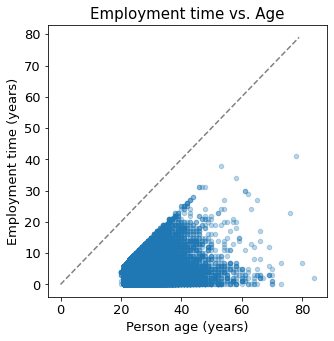

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(df['person_age'], df['person_emp_length'], alpha=0.3, s=20)
plt.plot(range(80), range(80), c='gray', linestyle='--',label='')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Person age (years)', fontsize=13)
plt.ylabel('Employment time (years)', fontsize=13)
plt.title('Employment time vs. Age', fontsize=15)
plt.show()

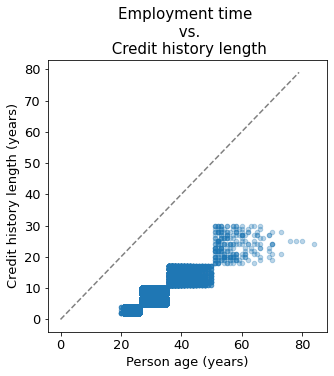

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(df['person_age'], df['cb_person_cred_hist_length'], alpha=0.3, s=20)
plt.plot(range(80), range(80), c='gray', linestyle='--',label='')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Person age (years)', fontsize=13)
plt.ylabel('Credit history length (years)', fontsize=13)
plt.title('Employment time \n vs.\n Credit history length', fontsize=15)
plt.show()

In the previous plots we also indicate by a gray dashed line the hypothetical line in which the employment time or the creidt history length are equal to the age of the person. Of course, all points should be below this line as it is impossible that someone has a job or a credit history for more time than its own age. All the records are just fine.

Now, we shouldn't have any null value

In [17]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Perfect!

### Numerical features

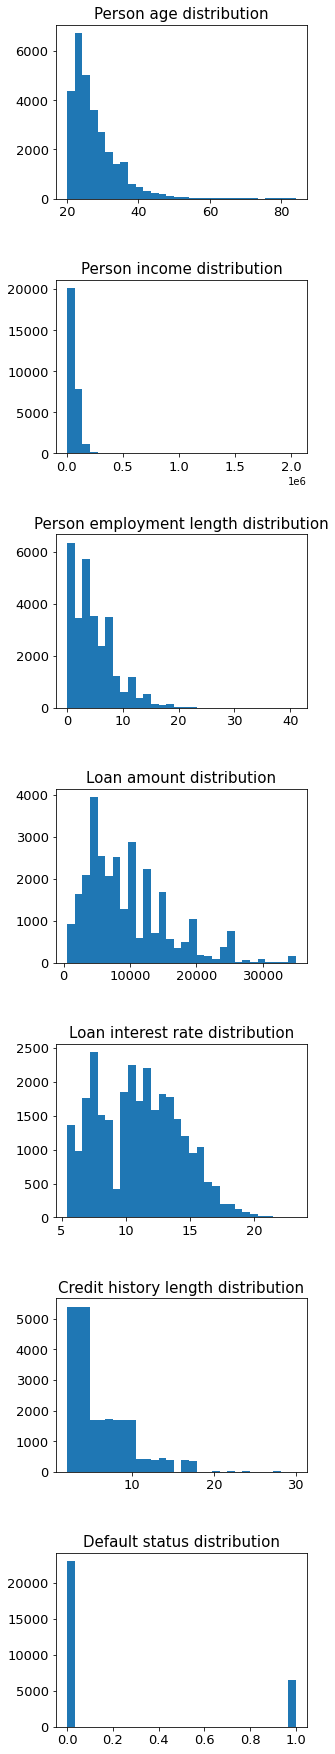

In [268]:
# List of numerical features
num_feat=['person_age','person_income',\
          'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'loan_status']

# List of titles for the corresponding histograms
titles=['Person age distribution', 'Person income distribution', 'Person employment length distribution',\
        'Loan amount distribution', 'Loan interest rate distribution',\
        'Credit history length distribution', 'Default status distribution']

# Plot the numerical features distributions
fig, axs = plt.subplots(len(num_feat), 1, figsize=(5,25))
for i in range(len(num_feat)):
    axs[i].hist(df[num_feat[i]], bins=30)
    axs[i].tick_params(labelsize=13)
    axs[i].set_title(titles[i], fontsize=15)
fig.tight_layout(pad=3)

Most of the distributions are right-skewed. We could remove some additional outliers in the right tails of some distributions, but let's keep them for a first analysis.

In the particular case of the target feature, *loan_status*, we notice that we are dealing with an imbalanced dataset where we have much more records of non-default loans than default loans. Again, for a first analysis we will not apply any resampling technique.

### Categorical features 

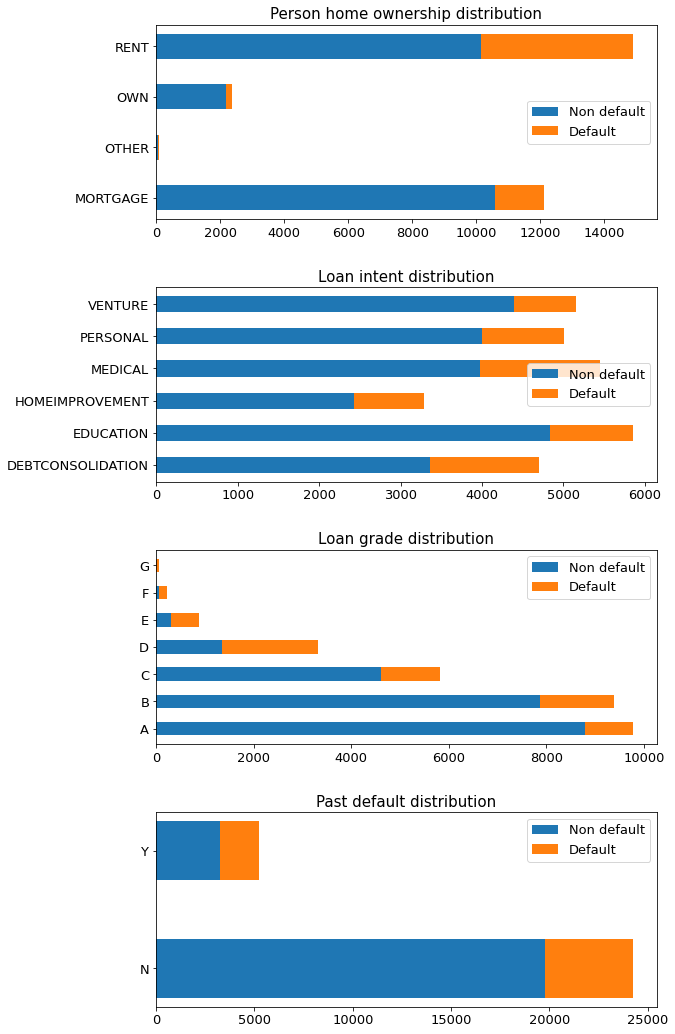

In [269]:
# List of categorical features
cat_feat=['person_home_ownership','loan_intent',\
          'loan_grade', 'cb_person_default_on_file']

# List of titles for the corresponding histograms
titles=['Person home ownership distribution', 'Loan intent distribution',\
        'Loan grade distribution', 'Past default distribution']

# Display a stacked bar plot for every categorical features distributions
fig, axs = plt.subplots(len(cat_feat), 1, figsize=(10,15))
for i in range(len(cat_feat)):
    pivot_df=df.groupby([cat_feat[i], 'loan_status']).size().unstack()
    axs[i].barh(pivot_df.index, pivot_df[0], height=0.5, label='Non default')
    axs[i].barh(pivot_df.index, pivot_df[1], left=pivot_df[0], height=0.5, label='Default')
    axs[i].tick_params(labelsize=13)
    axs[i].set_title(titles[i], fontsize=15)
    axs[i].legend(fontsize=13)
fig.tight_layout(pad=3)

In most of the categories we notice the dominance of non-default over default loans, which one would expect due to the imbalance discussed previously. However, there is a clear dominance of default loans over non-default loans for loans with grades D, E and F. We can see that dominance also in loans with grade G but that could be due to a statistical fluctuations. The loan grade, then, might be a good discriminator.

# Model Selection

We want to construct a model that predicts the status of the loan (default or not deafult) from the other attributes. Let's then split the independent features from the target *loan_status*.

In [18]:
X=df.drop('loan_status', axis=1)
y=df['loan_status']

We split the whole data into a train and a test set:

- The train set will be used to select the best model and perform hyperparameter tuning. To that effect we will mainly use K-fold cross validation, in which this set is split K times into a train subset and a validation set (which are different at each time). The model is trained in the train subset and evaluated on the validation set and the score of the model is given by the average value of all scores. As we expect all of this K splits to behave roughly in the same way we will split additionally the train set into a train subset and a validation set (different from the ones in the K-fold cross validation) and use them only to generate some visualization plots that will help us understand better how the cross validation procedure is working.

- The test set won't be used until a final model with custom hyperparameters is selected. It will be used only once to assess the perfomance of the final model.

In [19]:
from sklearn.model_selection import train_test_split

seed=93
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=seed, test_size=0.2)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, stratify=y_train, shuffle=True, random_state=seed)

print('Train set number of entries: {}'.format(X_train.shape[0]))
print('Train sub set number of entries: {}'.format(X_train_sub.shape[0]))
print('Validation set number of entries: {}'.format(X_val.shape[0]))
print('Test set number of entries: {}'.format(X_test.shape[0]))

Train set number of entries: 23567
Train sub set number of entries: 17675
Validation set number of entries: 5892
Test set number of entries: 5892


We focus on two score metrics to discriminate between them:

- f2 score as the primary discriminator: It is an $f\beta$ score with $\beta=2$. It contains the information of both precision and recall but giving more importance to recall. This is because we rather prefer rejecting a non-default loan than accepting a default one, that is, we want a bigger value for recall. However, at the same time we don't want to lose too much precision. The value $\beta=2$ is meant to deal with it.

- The ROC AUC score as the secondary discriminator: Signals the general performance of the classifier at various thresholds.

In this first part of model selection we won't perform any hyperparameter tuning as we want to roughly select the most promising models to further explore them later. We will assess the scores of various classifiers (Logistic regression, K-nearest neighbours, Naive Bayes, Decision tree, Random forest, Gradient Boosting, AdaBoost, XGBoost) training them with the imbalanced data (without resampling) first and then with the data after a random oversampling of the minority class. But before, we will define some useful functions.

Let's define the function *classifier_pipeline* that construct and returns a pipeline from a classifier, following the steps:
- One hot encode the categorical features *person_home_ownership*, *loan_intent*, *cb_person_default_on_file* and *loan_grade*

- Standardize the features if feature_scaling=True. The default value for feature_scaling is False, which ignores this step.

- Applies a resampling technique. The default resampling_technique='None' ignores this step.

- Instantiate a classifier.

In [19]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_validate
from imblearn.pipeline import make_pipeline

seed=93

def classifier_pipeline(classifier, feature_scaling=False, resampling_technique='None'):
    """Build and return pipeline from a classifier with the following steps: one-hot encode the categorical features,\
    perfom feature scaling if feature_scaling=True, resample the data with the value of resampling_technique \
    and instantiate the classifier."""
    
    # Features to one-hot-encode
    ohe_feat=['person_home_ownership','loan_intent', 'cb_person_default_on_file', 'loan_grade']
    # One hot encode the categorical features
    transformer=ColumnTransformer(transformers=[('ohe', OneHotEncoder(), ohe_feat)], remainder='passthrough')
    # Standardize features
    scaler=StandardScaler()
    
    if resampling_technique=='None':
        if feature_scaling==True:
            pipeline=make_pipeline(transformer, scaler, classifier)
        elif feature_scaling==False:
            pipeline=make_pipeline(transformer, classifier)
    else:
        rus = resampling_technique
        if feature_scaling==True:
            pipeline=make_pipeline(transformer, scaler, rus, classifier)
        elif feature_scaling==False:
            pipeline=make_pipeline(transformer, rus, classifier)
            
    return pipeline

And the *pipeline_cv_scores* function that performs an stratified 5-fold cross validation and compute the two scores mentioned above (F2 and ROC AUC):

In [20]:
from sklearn.metrics import fbeta_score, make_scorer
f2_score=make_scorer(fbeta_score,beta=2)

def pipeline_cv_scores(pipeline, X, y):
    """Return the F2 and ROC AUC scores of pipeline after a 5-fold stratified cross validation."""
    
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    
    scores={}
    roc_auc_scores=[]
    f2_scores=[]

    for ids in cv.split(X, y):
        X_train = X.iloc[ids[0], :]
        y_train = y.iloc[ids[0]]
        X_val = X.iloc[ids[1], :]
        y_val = y.iloc[ids[1]]
    
        pipeline.fit(X_train, y_train)
        y_pred_val_proba = pipeline.predict_proba(X_val)[:,1]
        y_pred_val = pipeline.predict(X_val)
        roc_auc_scores.append(roc_auc_score(y_val, y_pred_val_proba))
        f2_scores.append(fbeta_score(y_val, y_pred_val, beta=2))
    
    scores['test_roc_auc']=np.array(roc_auc_scores)
    scores['test_f2']=np.array(f2_scores)
    
    return scores

Next, we import the classifiers we want to assess in this first part of the model selection. At the end we will only keep the best three.

In [21]:
# Import the necessary classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier


# Define list containing the names and the estimators instances
classifiers=[['Logistic Regression', LogisticRegression()],\
             ['KNN', KNeighborsClassifier()],\
             ['Naive Bayes', GaussianNB()],\
             ['Decision Tree', DecisionTreeClassifier(random_state=seed)],\
             ['Random Forest', RandomForestClassifier(random_state=seed)],\
             ['Gradient Boosting', GradientBoostingClassifier(random_state=seed)],\
             ['AdaBoost', AdaBoostClassifier(random_state=seed)],\
             ['XGBoost', XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss')]
              ]

We will cross validate the classifiers first constructing the pipelines with *classifier_pipeline* function and then performing cross validation and returning their scores with the *pipeline_cv_scores* function.

**NOTE 1**: We separate the classifiers that need standardization when constructing the pipelines(Logistic Regression, KNN and Naive Bayes) from the ones that don't (all the tree based classifiers).

**NOTE 2**: The cross validation is made on the *X_train* and *y_train* sets.

### No resampling

Let's evaluate the scores of the models without any resampling technique.

In [22]:
# Dictionary to store the name of the classifier and the ir scores after cross validation
classifiers_scores={}

# Cross validate the classifiers that need standardization
for classifier in classifiers[:3]:
    pipeline=classifier_pipeline(classifier[1], feature_scaling=True, resampling_technique='None')
    classifiers_scores[classifier[0]]=pipeline_cv_scores(pipeline, X_train, y_train)

# Cross validate the classifiers that does not need standardization
for classifier in classifiers[3:]:
    pipeline=classifier_pipeline(classifier[1], feature_scaling=False, resampling_technique='None')
    classifiers_scores[classifier[0]]=pipeline_cv_scores(pipeline, X_train, y_train)

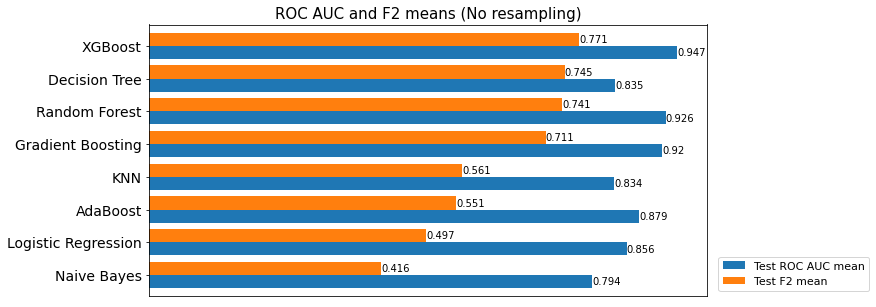

In [23]:
classifiers_names=[]
test_roc_auc_means=[]
#train_roc_auc_means=[]
test_f2_means=[]
#train_f2_means=[]

for k,v in classifiers_scores.items():
    classifiers_names.append(k)
    test_roc_auc_means.append(round(v['test_roc_auc'].mean(), 3))
#    train_roc_auc_means.append(round(v['train_roc_auc'].mean(),3))
    test_f2_means.append(round(v['test_f2'].mean(),3))
#    train_f2_means.append(round(v['train_f2'].mean(),3))

scores_stat={'Test ROC AUC mean':test_roc_auc_means,\
#             'Train ROC AUC mean':train_roc_auc_means,\
             'Test F2 mean': test_f2_means,\
#             'Train F2 mean': train_f2_means
            }

scores_df=pd.DataFrame(scores_stat, index=classifiers_names)
scores_df_sorted=scores_df.sort_values('Test F2 mean', ascending=True)

plt.rcParams["figure.figsize"] = [10,5]
ax=scores_df_sorted.plot.barh(y=['Test ROC AUC mean', 'Test F2 mean'], width=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
x_axis=ax.axes.get_xaxis()
x_axis.set_visible(False)
plt.xlim(0,1)
plt.legend(fontsize=11, loc='lower right', bbox_to_anchor=(1.3,0))
plt.title('ROC AUC and F2 means (No resampling)', fontsize=15)
plt.show()

### Oversampling

We noted previously that we are working with an imbalanced dataset. Specifically: 

In [26]:
print("Number of entries with 'default' class (minority class): {}".format((y_train==1).sum()))
print("Number of entries with 'non-default' class (majority class): {}".format((y_train==0).sum()))

Number of entries with 'default' class (minority class): 5170
Number of entries with 'non-default' class (majority class): 18397


The entries of the minority class (default) represents a $21\%$ of the total number of entries. This imbalance may be influencing the way the models are trained by paying more attention to the majority class and relegating the ones of the minority class. For that reason, we should perform some resampling techniques to the data before training it. There are many resampling techniques available, but all of them seek to balance the number of entries of the two classes, some of them by reducing the number of entries of the majority class, others by increasing the number of entries of the minority class or even by combining the two approaches.

In this part of the analysis we will evaluate the same classifiers as before, but with a resampling technique. Specifically, we will use the Random Oversampling technique, which consists on randomly selecting examples of the minority class and adding it to the training dataset. We will use the imblearn module, from where we can import many resampling algorithms.

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
# Collect the scores for the pipelines with Random oversampling
classifiers_scores={{}

for classifier in classifiers[:3]:
    pipeline=classifier_pipeline(classifier[1], feature_scaling=True, resampling_technique=RandomOverSampler(random_state=seed))
    classifiers_scores[classifier[0]]=pipeline_cv_scores(pipeline, X_train, y_train)

for classifier in classifiers[3:]:
    pipeline=classifier_pipeline(classifier[1], feature_scaling=False, resampling_technique=RandomOverSampler(random_state=seed))
    classifiers_scores[classifier[0]]=pipeline_cv_scores(pipeline, X_train, y_train)

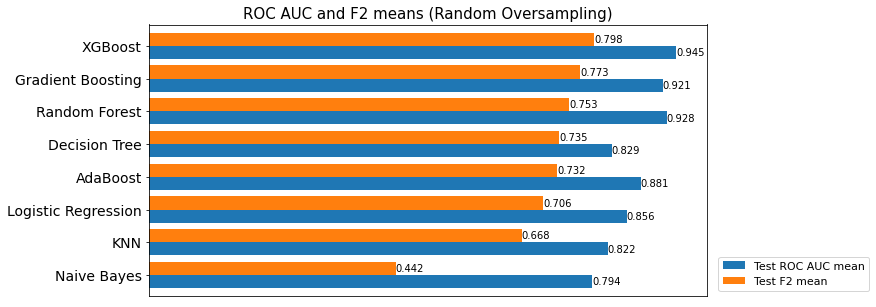

In [26]:
classifiers_names=[]
test_roc_auc_means=[]
#train_roc_auc_means=[]
test_f2_means=[]
#train_f2_means=[]

for k,v in classifiers_scores.items():
    classifiers_names.append(k)
    test_roc_auc_means.append(round(v['test_roc_auc'].mean(), 3))
#    train_roc_auc_means.append(round(v['train_roc_auc'].mean(), 3))
    test_f2_means.append(round(v['test_f2'].mean(), 3))
#    train_f2_means.append(round(v['train_f2'].mean(), 3))

scores_stat={'Test ROC AUC mean':test_roc_auc_means,\
#             'Train ROC AUC mean':train_roc_auc_means,\
             'Test F2 mean': test_f2_means,\
#             'Train F2 mean': train_f2_means
            }

scores_df=pd.DataFrame(scores_stat, index=classifiers_names)
scores_df_sorted=scores_df.sort_values('Test F2 mean', ascending=True)

plt.rcParams["figure.figsize"] = [10,5]
ax=scores_df_sorted.plot.barh(y=['Test ROC AUC mean', 'Test F2 mean'], width=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
x_axis=ax.axes.get_xaxis()
x_axis.set_visible(False)
plt.xlim(0,1)
plt.legend(fontsize=11, loc='lower right', bbox_to_anchor=(1.3,0))
plt.title('ROC AUC and F2 means (Random Oversampling)', fontsize=15)
plt.show()

Applying random oversampling had a small effect in the ROC AUC but improved the recall considerably for most of the estimators. That is, in general, the resampling technique is useful to improve the performance of the classifiers.

So far, XGBoost seems to be the most promising model but we did not perform any hyperparameter tuning yet, so, the next two classifiers(gradient boosting and random forest) still have chances to overcome it.

We will evaluate those three models with hyperparameter tuning, but before, let's explore more the resampling techniques. Let's just take one estimator(XGBoost) to see how different techniques affect the performance of the model. We will try with the following ones:
- Undersampling: Random undersampling, Tomek Links, Near Miss.
- Oversampling: Random oversampling, SMOTE
- Combined over and under sampling: SMOTE + Tomek links

### XGBoost with various resampling techniques

In [27]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss, EditedNearestNeighbours
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

resampling_techniques=[['Random Undersampling', RandomUnderSampler(random_state=seed)],\
                       ['Tomek Links', TomekLinks(n_jobs=-1)],\
                       ['Near Miss', NearMiss(n_jobs=-1)],\
                       ['Edited Nearest Neighbours', EditedNearestNeighbours()],\
                       ['Random Oversampling', RandomOverSampler(random_state=seed)],\
                       ['SMOTE', SMOTE(random_state=seed)],\
                       ['Borderline SMOTE', BorderlineSMOTE(random_state=seed)],\
                       ['SMOTE + Tomek', SMOTETomek(random_state=seed, n_jobs=-1)],
                       ['SMOTE + ENN', SMOTEENN(random_state=seed)]]

In [28]:
resampling_tech_scores={}

for technique in resampling_techniques:
    pipeline=classifier_pipeline(XGBClassifier(random_state=seed, eval_metric='logloss', use_label_encoder=False),\
                                 feature_scaling=False, resampling_technique=technique[1])
    resampling_tech_scores[technique[0]]=pipeline_cv_scores(pipeline, X_train, y_train)

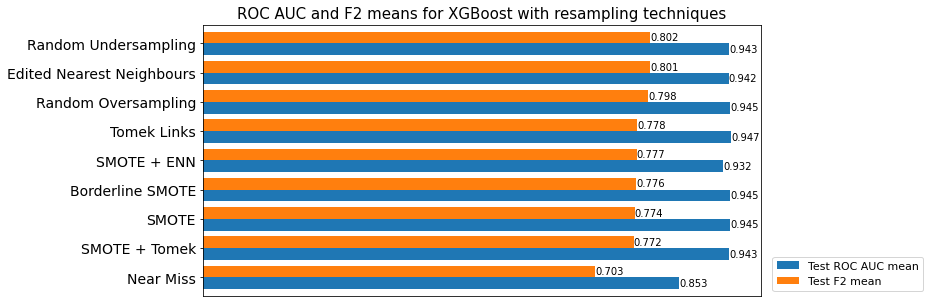

In [29]:
techniques_name=[]
test_roc_auc_means=[]
test_f2_means=[]

for k,v in resampling_tech_scores.items():
    techniques_name.append(k)
    test_roc_auc_means.append(round(v['test_roc_auc'].mean(), 3))
    test_f2_means.append(round(v['test_f2'].mean(),3))

scores_stat={'Test ROC AUC mean':test_roc_auc_means,\
             'Test F2 mean':test_f2_means
            }

scores_df=pd.DataFrame(scores_stat, index=techniques_name)
scores_df_sorted=scores_df.sort_values('Test F2 mean', ascending=True)

plt.rcParams["figure.figsize"] = [10,5]
ax=scores_df_sorted.plot.barh(y=['Test ROC AUC mean', 'Test F2 mean'], width=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
x_axis=ax.axes.get_xaxis()
x_axis.set_visible(False)
plt.xlim(0,1)
plt.legend(fontsize=11, loc='lower right', bbox_to_anchor=(1.3,0))
plt.title('ROC AUC and F2 means for XGBoost with resampling techniques', fontsize=15)
plt.show()

We see that the Random Undersampling technique presents the higher F2 score, although it is closely followed by the Edited Nearest Neighbors and the RandomOversampling techniques. Since RandomUndersampling is also the less computationally expensive of these three techniques, we will keep it.

Next, we will do the hyperparameter tuning of the three classifiers selected before (Random Forest, Gradient boosting and XGBoost) with the Random Undersampling technqiue applied to the training data.

### Random Forest hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
rf_pipeline=classifier_pipeline(\
                RandomForestClassifier(random_state=seed),\
                feature_scaling=False, resampling_technique=RandomUnderSampler(random_state=seed)
                               )

parameters={'randomforestclassifier__n_estimators':[100, 125, 150, 175, 200],\
            'randomforestclassifier__max_features':[None, 'sqrt', 'log2'] 
           }

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
rf_grid_cv=GridSearchCV(rf_pipeline, parameters, cv=cv, scoring=f2_score, return_train_score=True)
rf_grid_cv.fit(X_train, y_train)
print('Model: Random Forest')
print('Best parameters: {}'.format(rf_grid_cv.best_params_))
print('Best f2 score: {}'.format(rf_grid_cv.best_score_))

Model: Random Forest
Best parameters: {'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 175}
Best f2 score: 0.7819665360489851


With random undersampling and the parameters max_features=None and n_estimators=175, the F2 score of the RandomForest Classifier increases from 0.753 to 0.782.

### Gradient boosting hyperparameter tuning

In [32]:
gb_pipeline=classifier_pipeline(\
                GradientBoostingClassifier(random_state=seed),\
                feature_scaling=False, resampling_technique=RandomUnderSampler(random_state=seed)
                               )

parameters={'gradientboostingclassifier__n_estimators':[ 300, 400, 500, 600],\
            'gradientboostingclassifier__max_depth': [5 , 6, 7],\
            'gradientboostingclassifier__learning_rate': [0.15, 0.2, 0.25, 0.3]}

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
gb_grid_cv=GridSearchCV(gb_pipeline, parameters, cv=cv, scoring=f2_score, return_train_score=True)
gb_grid_cv.fit(X_train, y_train)
print('Model: Gradient Boosting')
print('Best parameters: {}'.format(gb_grid_cv.best_params_))
print('Best f2 score: {}'.format(gb_grid_cv.best_score_))

Model: Gradient Boosting
Best parameters: {'gradientboostingclassifier__learning_rate': 0.3, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 500}
Best f2 score: 0.8119999358692105


With random undersampling and the parameters: learning_rate=0.3, max_depth=5 and n_estimators=500, the F2 score of the RandomForest Classifier increases from 0.773 to 0.812.

### XGBoost hyperparameter tuning

In [33]:
parameters={'xgbclassifier__n_estimators':[500, 600, 700],\
            'xgbclassifier__learning_rate': [0.15, 0.2, 0.25]}

xgb_pipeline=classifier_pipeline(XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss'),\
                             feature_scaling=False, resampling_technique=RandomUnderSampler(random_state=seed))

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
xgb_grid_cv=GridSearchCV(xgb_pipeline, parameters, cv=cv, scoring=f2_score, refit=True)
xgb_grid_cv.fit(X_train, y_train)
xgb_classifier=xgb_grid_cv.best_estimator_
print('Model: XGBoost')
print('Best parameters: {}'.format(xgb_grid_cv.best_params_))
print('Best f2 score: {}'.format(xgb_grid_cv.best_score_))

Model: XGBoost
Best parameters: {'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__n_estimators': 600}
Best f2 score: 0.8088531190476418


With random undersampling and the parameters: learning_rate=0.2 and n_estimators=600, the F2 score of the RandomForest Classifier increases from 0.798 to 0.809.

#### Comparing scores

In [34]:
rf_f2_mean = rf_grid_cv.best_score_
rf_f2_std = rf_grid_cv.cv_results_['std_test_score'][rf_grid_cv.best_index_]
gb_f2_mean = gb_grid_cv.best_score_
gb_f2_std = gb_grid_cv.cv_results_['std_test_score'][gb_grid_cv.best_index_]
xgb_f2_mean = xgb_grid_cv.best_score_
xgb_f2_std = xgb_grid_cv.cv_results_['std_test_score'][xgb_grid_cv.best_index_]

print('Best F2 scores')
print('---------------------')
print('Random Forest: {} +- {}'.format(round(rf_f2_mean, 3), round(2*rf_f2_std, 3)))
print('Gradient Boosting: {} +- {}'.format(round(gb_f2_mean, 3), round(2*gb_f2_std, 3)))
print('XGBoost: {} +- {}'.format(round(xgb_f2_mean, 3), round(2*xgb_f2_std, 3)))

Best F2 scores
---------------------
Random Forest: 0.782 +- 0.011
Gradient Boosting: 0.812 +- 0.019
XGBoost: 0.809 +- 0.016


After tuning the hyperparameters to maximize the F2 score of the three most promising models, we find that the Gradient Boosting classifier is the one with the highest mean F2 score (0.812), very closely folllowed by the XGBoost classifier (0.809). However, their 2 $\sigma$ confidence interval overlap. There is a high probability that the difference between their means are due to randomness. Let's estimate additionally the ROC AUC of these models before taking a decision.

In [35]:
# Cross validate the Random Forest model with the best hyperparameters
rf_tuned_model=rf_grid_cv.best_estimator_
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
rf_scores=cross_validate(rf_tuned_model, X_train, y_train, scoring={'roc_auc':'roc_auc'}, cv=cv)

rf_roc_auc_mean=rf_scores['test_roc_auc'].mean()
rf_roc_auc_std=rf_scores['test_roc_auc'].std()


# Cross validate the Gradient Boosting model with the best hyperparameters
gb_tuned_model=gb_grid_cv.best_estimator_
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
gb_scores=cross_validate(gb_tuned_model, X_train, y_train, scoring={'roc_auc':'roc_auc'}, cv=cv)

gb_roc_auc_mean=gb_scores['test_roc_auc'].mean()
gb_roc_auc_std=gb_scores['test_roc_auc'].std()


# Cross validate the XGBoost model with the best hyperparameters
xgb_tuned_model=xgb_grid_cv.best_estimator_
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
xgb_scores=cross_validate(xgb_tuned_model, X_train, y_train, scoring={'roc_auc':'roc_auc'}, cv=cv)

xgb_roc_auc_mean=xgb_scores['test_roc_auc'].mean()
xgb_roc_auc_std=xgb_scores['test_roc_auc'].std()

In [36]:
print('ROC AUC')
print('---------------------')
print('Random Forest: {} +- {}'.format(round(rf_roc_auc_mean, 3), round(2*rf_roc_auc_std, 3)))
print('Gradient Boosting: {} +- {}'.format(round(gb_roc_auc_mean, 3), round(2*gb_roc_auc_std, 3)))
print('XGBoost: {} +- {}'.format(round(xgb_roc_auc_mean, 3), round(2*xgb_roc_auc_std, 3)))

ROC AUC
---------------------
Random Forest: 0.93 +- 0.01
Gradient Boosting: 0.941 +- 0.011
XGBoost: 0.943 +- 0.01


We see that the ROC AUC scores of the Gradient Boosting and the XGBoost models are also very similar. We decide to choose the XGBoost model as our best model as it is less computationally expensive.

Now, there is only one final variable to tune: the threshold that discriminates between classes (default or non default). To see why this is important let's plot the distribution of predicted probabilities by training the chosen model in the train subset (X_train_sub and y_train_sub) and evaluating it in the validation set(X_val, y_val).

In [57]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, shuffle=True, stratify=y_train)

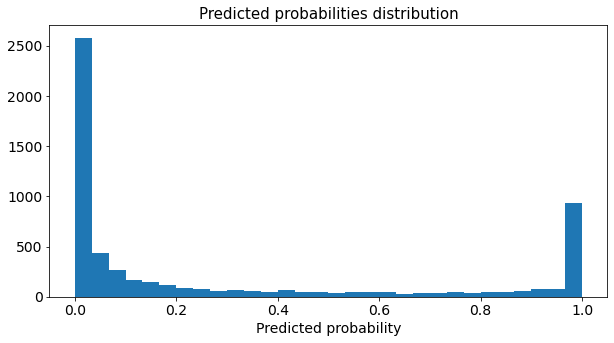

In [58]:
# Instantiate the chosen model and train it with X_train_sub and y_train_sub
xgb_tuned_model=xgb_grid_cv.best_estimator_
xgb_tuned_model.fit(X_train_sub, y_train_sub)

# Predict probabilities on the validation set
y_pred_proba_val=xgb_tuned_model.predict_proba(X_val)[:,1]

# Plot the distribution of probabilities
plt.hist(y_pred_proba_val, bins=30)
plt.xlabel('Predicted probability', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Predicted probabilities distribution', fontsize=15)
plt.show()

We see that the model is pretty sure about its predictions for many loans. However, we must still define a threshold for the other loans to be classified as deafult or not. So far we have been using the default threshold value 0.5, but, since we have the freedom to fix it to other value we can take advantage of it to maximize profits.

To understand how the selection of a threshold affects the outcome of our portfolio, let's build a atrategy table that contains the following variables:

- **Acceptance rate**: The ratio of the number of accepted loans over the total number of required loans.
- **Threshold**: The value of the predicted probability of default that discriminate between default and non-default loans.
- **Bad rate**: The ratio of the number of accepted default loans over the total number of accepted loans
- **Accepted loans**: The number of accepted loans.
- **Average loan amount**: The average value of all the required loan values.
- **Profit**: The profit of the portfolio evaluated as
$$\sum \left(\text{Nondefault loan amount}\times \text{Interest rate} - \text{Default loan amount}\right)$$
Here we are assuming that the  Loss Given Default (LGD) is 1.0. That is, if a loan defaults we lose the $100\%$ of the loan amount.
- **Profit percentage**: The ratio of the profit over the total amount of required loans (in percentage).

The profit percentage is a good indicator of the performance of the model as it is independent of the total amount of loans required. We will choose the threshold that maximizes this indicator.

In [287]:
def strategy_table(X, y_true, y_pred_proba=None, acceptance_rates=np.arange(0.3,1.05,0.05)):
    """Build and return the strategy table."""
    X_y=X.assign(loan_status=y_true)
    thresholds=[]
    bad_rates=[]
    estimated_values=[]
    n_accepted_loans=[]
    avg_loan_amnt=[]
    profits=[]
   # profit_totloan_rates=[]

    for accept_rate in acceptance_rates:
        threshold=np.quantile(y_pred_proba, accept_rate)
        y_predicted=np.where(y_pred_proba>threshold, 1, 0)
        accepted_indices=(y_predicted==0)
        X_y_accepted=X_y[accepted_indices]
        X_y_accep_default=X_y_accepted[X_y_accepted['loan_status']==1]
        X_y_accep_nondefault=X_y_accepted[X_y_accepted['loan_status']==0]
        bad_rate=sum(y_true[accepted_indices])/len(accepted_indices)
        
        profit = sum(X_y_accep_nondefault['loan_amnt']*X_y_accep_nondefault['loan_int_rate']/100)\
                - sum(X_y_accep_default['loan_amnt'])
        
        thresholds.append(threshold)
        bad_rates.append(bad_rate)
        profits.append(profit)
        n_accepted_loans.append(X_y_accepted.shape[0])
        avg_loan_amnt.append(X_y['loan_amnt'].mean())
        
    strat_tab=pd.DataFrame(zip(acceptance_rates, thresholds, bad_rates, n_accepted_loans,\
                               avg_loan_amnt, profits),\
             columns=['Acceptance rate', 'Threshold', 'Bad rate', 'Accepted loans', 'Average loan amount', 'Profit']).sort_values('Acceptance rate', ascending=False).reset_index()
    strat_tab['Profit percentage'] = strat_tab['Profit']*100/(X_y.shape[0]*strat_tab['Average loan amount'])
    return strat_tab.drop('index',axis=1)

In [288]:
strat_df=strategy_table(X_val, y_val, y_pred_proba=y_pred_proba_val)

In [289]:
strat_df

,Acceptance rate,Threshold,Bad rate,Accepted loans,Average loan amount,Profit,Profit percentage
0,1.00,1.000000,0.219450,5892,9634.190428,-9.698594e+06,-17.085622
1,0.95,0.999906,0.169382,5597,9634.190428,-5.919744e+06,-10.428574
2,0.90,0.998429,0.121012,5302,9634.190428,-2.708254e+06,-4.771022
3,0.85,0.978426,0.076714,5008,9634.190428,1.404467e+05,0.247419
4,0.80,0.836803,0.052614,4713,9634.190428,1.454426e+06,2.562204
5,0.75,0.599097,0.039545,4419,9634.190428,1.926029e+06,3.393008
6,0.70,0.402576,0.033096,4124,9634.190428,1.960832e+06,3.454319
7,0.65,0.245523,0.025798,3830,9634.190428,2.050263e+06,3.611866
8,0.60,0.151736,0.018500,3535,9634.190428,2.115171e+06,3.726212
9,0.55,0.092598,0.013408,3241,9634.190428,2.116558e+06,3.728655


The strategy table shows that there is an optimum value for the threshold in order to maximize the profit percentage. In this case this value is around $0.09$ corresponding to a profit percentage of $3.73\%$ and an acceptance rate of $55\%$.

To determine this optimal threshold more accurately, we will perform a 10-fold cross validation on the training dataset and select the best threshold for each fold. 

In [290]:
def threshold_cv(model, X, y):
    """Performs cross validation and returns the optimal values of profit percentage, threshold,\
    acceptance rate and bad rates."""
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    
    best_vars={}
    
    profit_percs=[]
    thresholds=[]
    bad_rates=[]
    acceptance_rates=[]
    
    for ids in cv.split(X, y):
        X_train = X.iloc[ids[0], :]
        y_train = y.iloc[ids[0]]
        X_val = X.iloc[ids[1], :]
        y_val = y.iloc[ids[1]]
    
        model.fit(X_train, y_train)
        y_pred_val_proba = model.predict_proba(X_val)[:,1]
    
        strat_df = strategy_table(X_val, y_val, y_pred_proba=y_pred_val_proba, acceptance_rates=np.arange(0.3,1,0.01))
            
        idx_max_profit=strat_df['Profit percentage'].idxmax()
        best_pr_perc, best_thresh, best_bad_rate, best_accept_rate  = \
                        strat_df.iloc[idx_max_profit,:][['Profit percentage', 'Threshold', 'Bad rate', 'Acceptance rate']]

        profit_percs.append(best_pr_perc)
        thresholds.append(best_thresh)
        bad_rates.append(best_bad_rate)
        acceptance_rates.append(best_accept_rate)
    
    best_vars={'best_profit_percentages': np.array(profit_percs),\
               'best_bad_rates': np.array(bad_rates),\
               'best_acceptance_rates': np.array(acceptance_rates),\
               'best_thresholds': np.array(thresholds)
              }
    
    return best_vars

In [291]:
thresh_cv_results=threshold_cv(xgb_tuned_model, X_train, y_train)

The values corresponding to the best profit percentages of each fold on the cross validation procedure are:

In [101]:
thresh_cv_results

{'best_profit_percentages': array([4.19735413, 4.5676899 , 4.19314427, 3.84192559, 3.76915714,
        4.44539206, 4.4940145 , 4.27396283, 3.84637155, 4.50213779]),
 'best_bad_rates': array([0.0199406 , 0.01824353, 0.02545609, 0.01654646, 0.02248621,
        0.01103097, 0.02460755, 0.01952462, 0.01825127, 0.02504244]),
 'best_acceptance_rates': array([0.64, 0.65, 0.64, 0.58, 0.62, 0.57, 0.68, 0.66, 0.61, 0.71]),
 'best_thresholds': array([0.19568927, 0.25669895, 0.23581629, 0.14673565, 0.15925737,
        0.11800937, 0.31891414, 0.29013641, 0.18007978, 0.43407217])}

Next, we compute the mean and the standard deviation of the indicators and display their confidence interval with 2 standard deviations.

In [121]:
best_profit_perc_mean = thresh_cv_results['best_profit_percentages'].mean()
best_profit_perc_std = thresh_cv_results['best_profit_percentages'].std()
best_bad_rate_mean = thresh_cv_results['best_bad_rates'].mean()
best_bad_rate_std = thresh_cv_results['best_bad_rates'].std()
best_acceptance_rates_mean = thresh_cv_results['best_acceptance_rates'].mean()
best_acceptance_rates_std = thresh_cv_results['best_acceptance_rates'].std()
best_thresholds_mean = thresh_cv_results['best_thresholds'].mean()
best_thresholds_std = thresh_cv_results['best_thresholds'].std()

print('Cross validation results')
print('----------------------------------------------------')
print('Best profit percentage: {:.3f} +- {:.3f}'.format(best_profit_perc_mean, 2*best_profit_perc_std))
print('Best bad rate: {:.3f} +- {:.3f}'.format(best_bad_rate_mean, 2*best_bad_rate_std))
print('Best acceptance rate: {:.3f} +- {:.3f}'.format(best_acceptance_rates_mean, 2*best_acceptance_rates_std))
print('Best threshold: {:.3f} +- {:.3f}'.format(best_thresholds_mean, 2*best_thresholds_std))

Cross validation results
----------------------------------------------------
Best profit percentage: 4.213 +- 0.571
Best bad rate: 0.020 +- 0.009
Best acceptance rate: 0.636 +- 0.082
Best threshold: 0.234 +- 0.181


So, to maximize the profit we would need to set a threshold around 0.23, which correspond to an acceptance arte of approximately 64%. This model with these threshold ensures to have a bad rate of about 2% with a profit percentage between 3.6% to 4.8%. 

## Model performance in unseen data

Let's finally evaluate our chosen model in the so far unseen test data. We first train it in the whole train dataset and predict the probbilities for the test set.

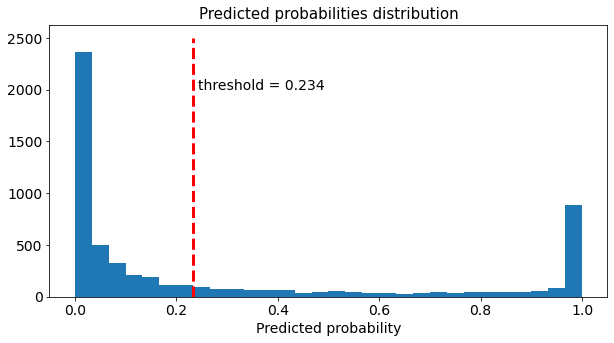

In [238]:
# Instantiate the model and train it with X_train and y_train
final_model=xgb_tuned_model.fit(X_train, y_train)

# Predict probabilities on the test data.
y_pred_proba=final_model.predict_proba(X_test)[:,1]

# Plot the distribution of probabilities
plt.hist(y_pred_proba, bins=30)
plt.xlabel('Predicted probability', fontsize=14)
plt.vlines(best_thresholds_mean, ymin=0, ymax=2500, color='red', linestyle='--', lw=3)
plt.text(best_thresholds_mean+0.01, 2000, 'threshold = {}'.format(round(best_thresholds_mean,3)), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Predicted probabilities distribution', fontsize=15)
plt.show()

In this plot we see the ditribution of the predicted probabilities of the test set along with a dashed red line signaling the position of the threshold that discriminate between non default and default loans. Let'suse this threshold to compute the acceptance rate, bad rate and profit percentage.

In [239]:
# Predict the classes given the selected threshold
y_pred_test=np.where(y_pred_proba>best_thresholds_mean, 1, 0)

# Add the colums for true default and predicted default to the train_test dataframe
test_df = X_test.assign(true_default=y_test, predicted_default=y_pred_test)

# Select the accepted default loans and accepted nondefault loans records
test_df_accepted_default = test_df[(test_df['predicted_default']==0) & (test_df['true_default']==1)]
test_df_accepted_nondefault = test_df[(test_df['predicted_default']==0) & (test_df['true_default']==0)]


# Compute the acceptance rate, bad rate and profit percentage
accept_rate = test_df[test_df['predicted_default']==0].shape[0]/test_df.shape[0]

bad_rate = test_df_accepted_default.shape[0]/test_df[test_df['predicted_default']==0].shape[0]

profit = (test_df_accepted_nondefault['loan_amnt']*test_df_accepted_nondefault['loan_int_rate']/100).sum() - \
        (test_df_accepted_default['loan_amnt']).sum()
profit_percentage = 100*profit/test_df['loan_amnt'].sum()

print('Results on the test set')
print('------------------------')
print('Acceptance rate: {:.3f}'.format(accept_rate))
print('Bad rate: {:.4f}'.format(bad_rate))
print('Profit percentage: {:.4f}%'.format(profit_percentage))

Results on the test set
------------------------
Acceptance rate: 0.647
Bad rate: 0.0388
Profit percentage: 3.8368%


We see that the model suggests to accept $64\%$ of the loans requirements. If we follow the model recommendation we would have a profit of $3.8\%$, which is in accordance with the estimated profit percentage interval of $[3.6 \%, 4.8\%]$

Additionally, let's plot the confusion matrix and show some scores for this classification.

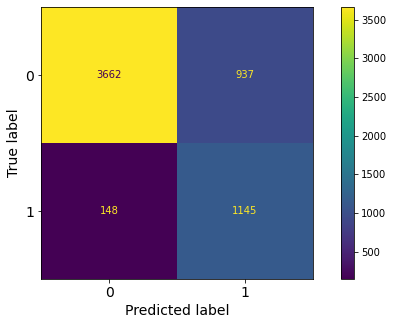

In [245]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [301]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      4599
           1       0.55      0.89      0.68      1293

    accuracy                           0.82      5892
   macro avg       0.76      0.84      0.77      5892
weighted avg       0.87      0.82      0.83      5892



A profit percentage of $3.8\%$ is good but let's see how it compares with the optimal profit percentage(the best maximum profit we could get if we would have known previously what is the best threshold).Let's build the strategy table.

In [228]:
strategy_table(X_test, y_test, y_pred_proba=y_pred_proba, acceptance_rates=np.arange(0.3,1.05,0.05))

,index,Acceptance rate,Threshold,Bad rate,Accepted loans,Average loan amount,Profit,Profit percentage
0,14,1.00,1.000000,0.219450,5892,9674.31687,-9.372599e+06,-16.442847
1,13,0.95,0.999818,0.169552,5598,9674.31687,-5.826624e+06,-10.221955
2,12,0.90,0.997610,0.119823,5302,9674.31687,-2.479332e+06,-4.349622
3,11,0.85,0.965681,0.075526,5008,9674.31687,3.032556e+05,0.532017
4,10,0.80,0.797950,0.053632,4713,9674.31687,1.509663e+06,2.648481
5,9,0.75,0.545861,0.041242,4419,9674.31687,1.926338e+06,3.379476
6,8,0.70,0.374663,0.031229,4124,9674.31687,2.192575e+06,3.846551
7,7,0.65,0.238500,0.025798,3830,9674.31687,2.180878e+06,3.826029
8,6,0.60,0.158327,0.020706,3535,9674.31687,2.113327e+06,3.707522
9,5,0.55,0.108233,0.015614,3241,9674.31687,2.116763e+06,3.713550


We see that the optimal profit percentage we could obtain is around $3.847\%$ if we would have chosen a threshold of $0.37$ with an acceptance rate of $0.7$. This profit is very near to the profit we obtain with our model threshold. **We were off only by $\bf{0.0097}\%$ to hit the maximum profit!!**

## Saving the final model

We save the model to be used in production later on

In [303]:
import pickle

# save the model to disk
filename = '../deploy/final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

## Summary

- A model of credit risk was build in order to maximize the portfolio profits from an imbalanced dataset.
- Two scores were used to select the best model: F2 and ROC AUC (in that order).
- A first model discrimination was performed by estimating the scores of several models without any hyperparameter tuning. This was done for two cases: for data without a resampling technique and for the same data with an oversampling technique. Additionaly, a performance estimation was done for the XGBoost classifier with different resampling techniques. After this, three models were selected for further exploration (XGBoostClassifier, GradientBoostingClassifier and RandomForestClassifier). We also selected the Random Undersampling technique as the best resampling technique.
- A hyperparameter tuning was performed for the three classifiers and the XGBoostClassifier with customized hyperparameters was chosen as the best one.
- A threshold for this selected model was chosen to maximize the profit percentage.
- Finally, the selected model was evaluated with the test set and it was seen that its performace it is accordance with the performace estimation of the model. The true profit percentage obtained was very satisfying whe compared with the optimal profit percentage.

## Conclusions

We obtain that performing a random undersampling technique to the imbalanced data of credit risk, using it to train a XGBoost Classifier with learning_rate=0.2 and n_estimators=600 and setting a threshold of 0.23 is the best strategy to maximize profits in a credit risk portfolio.

The model ensures a profit percentage of $4.213\% \pm 0.571\%$.